# BEN JACKANY CAPSTONE PROJECT
## FLIGHT DELAYS PREDICTIONS

![fig_06](img/fig_06.png)


### MACHINE LEARNING ( DECISION TREES)

### Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn import metrics, linear_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from scipy.optimize import curve_fit
from sklearn.svm import SVC
from random import sample

from sklearn.neighbors import KNeighborsClassifier

In [4]:
df = pd.read_csv('../Data/dfm.csv')

In [5]:
df

,FLIGHT_STATUS,DISTANCE,MONTH_10,MONTH_11,MONTH_12,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,ORIGIN_ABQ,ORIGIN_AGS,ORIGIN_ALB,ORIGIN_ANC,ORIGIN_ATL,ORIGIN_ATW,ORIGIN_AUS,ORIGIN_AVL,ORIGIN_AVP,ORIGIN_BDL,ORIGIN_BHM,ORIGIN_BIL,ORIGIN_BIS,ORIGIN_BNA,ORIGIN_BOI,ORIGIN_BOS,ORIGIN_BTR,ORIGIN_BTV,ORIGIN_BUF,ORIGIN_BUR,ORIGIN_BWI,ORIGIN_BZN,ORIGIN_CAE,ORIGIN_CAK,ORIGIN_CHA,ORIGIN_CHO,ORIGIN_CHS,ORIGIN_CID,ORIGIN_CLE,ORIGIN_CLT,ORIGIN_CMH,ORIGIN_COS,ORIGIN_CRW,ORIGIN_CVG,ORIGIN_DAB,ORIGIN_DAL,ORIGIN_DAY,ORIGIN_DCA,ORIGIN_DEN,ORIGIN_DFW,ORIGIN_DSM,ORIGIN_DTW,ORIGIN_ECP,ORIGIN_EGE,ORIGIN_ELP,ORIGIN_EWR,ORIGIN_EYW,ORIGIN_FAI,ORIGIN_FAR,ORIGIN_FAY,ORIGIN_FCA,ORIGIN_FLL,ORIGIN_FNT,ORIGIN_FSD,ORIGIN_GEG,ORIGIN_GNV,ORIGIN_GPT,ORIGIN_GRB,ORIGIN_GRR,ORIGIN_GSO,ORIGIN_GSP,ORIGIN_GTF,ORIGIN_HDN,ORIGIN_HNL,ORIGIN_HOU,ORIGIN_HPN,ORIGIN_HSV,ORIGIN_IAD,ORIGIN_IAH,ORIGIN_ICT,ORIGIN_ILM,ORIGIN_IND,ORIGIN_JAC,ORIGIN_JAN,ORIGIN_JAX,ORIGIN_JFK,ORIGIN_JNU,ORIGIN_KOA,ORIGIN_LAS,ORIGIN_LAX,ORIGIN_LEX,ORIGIN_LFT,ORIGIN_LGA,ORIGIN_LGB,ORIGIN_LIH,ORIGIN_LIT,ORIGIN_MCI,ORIGIN_MCO,ORIGIN_MDT,ORIGIN_MDW,ORIGIN_MEM,ORIGIN_MHT,ORIGIN_MIA,ORIGIN_MKE,ORIGIN_MLB,ORIGIN_MOB,ORIGIN_MSN,ORIGIN_MSO,ORIGIN_MSP,ORIGIN_MSY,ORIGIN_MTJ,ORIGIN_MYR,ORIGIN_OAK,ORIGIN_OGG,ORIGIN_OKC,ORIGIN_OMA,ORIGIN_ONT,ORIGIN_ORD,ORIGIN_ORF,ORIGIN_PBI,ORIGIN_PDX,ORIGIN_PHF,ORIGIN_PHL,ORIGIN_PHX,ORIGIN_PIT,ORIGIN_PNS,ORIGIN_PSC,ORIGIN_PSP,ORIGIN_PVD,ORIGIN_PWM,ORIGIN_RAP,ORIGIN_RDU,ORIGIN_RIC,ORIGIN_RNO,ORIGIN_ROA,ORIGIN_ROC,ORIGIN_RSW,ORIGIN_SAN,ORIGIN_SAT,ORIGIN_SAV,ORIGIN_SBN,ORIGIN_SDF,ORIGIN_SEA,ORIGIN_SFO,ORIGIN_SJC,ORIGIN_SJU,ORIGIN_SLC,ORIGIN_SMF,ORIGIN_SNA,ORIGIN_SRQ,ORIGIN_STL,ORIGIN_STT,ORIGIN_STX,ORIGIN_SYR,ORIGIN_TLH,ORIGIN_TPA,ORIGIN_TRI,ORIGIN_TUL,ORIGIN_TUS,ORIGIN_TVC,ORIGIN_TYS,ORIGIN_VPS,ORIGIN_XNA,ORIGIN_STATE_ABR_AL,ORIGIN_STATE_ABR_AR,ORIGIN_STATE_ABR_AZ,ORIGIN_STATE_ABR_CA,ORIGIN_STATE_ABR_CO,ORIGIN_STATE_ABR_CT,ORIGIN_STATE_ABR_FL,ORIGIN_STATE_ABR_GA,ORIGIN_STATE_ABR_HI,ORIGIN_STATE_ABR_IA,ORIGIN_STATE_ABR_ID,ORIGIN_STATE_ABR_IL,ORIGIN_STATE_ABR_IN,ORIGIN_STATE_ABR_KS,ORIGIN_STATE_ABR_KY,ORIGIN_STATE_ABR_LA,ORIGIN_STATE_ABR_MA,ORIGIN_STATE_ABR_MD,ORIGIN_STATE_ABR_ME,ORIGIN_STATE_ABR_MI,ORIGIN_STATE_ABR_MN,ORIGIN_STATE_ABR_MO,ORIGIN_STATE_ABR_MS,ORIGIN_STATE_ABR_MT,ORIGIN_STATE_ABR_NC,ORIGIN_STATE_ABR_ND,ORIGIN_STATE_ABR_NE,ORIGIN_STATE_ABR_NH,ORIGIN_STATE_ABR_NJ,ORIGIN_STATE_ABR_NM,ORIGIN_STATE_ABR_NV,ORIGIN_STATE_ABR_NY,ORIGIN_STATE_ABR_OH,ORIGIN_STATE_ABR_OK,ORIGIN_STATE_ABR_OR,ORIGIN_STATE_ABR_PA,ORIGIN_STATE_ABR_PR,ORIGIN_STATE_ABR_RI,ORIGIN_STATE_ABR_SC,ORIGIN_STATE_ABR_SD,ORIGIN_STATE_ABR_TN,ORIGIN_STATE_ABR_TX,ORIGIN_STATE_ABR_UT,ORIGIN_STATE_ABR_VA,ORIGIN_STATE_ABR_VI,ORIGIN_STATE_ABR_VT,ORIGIN_STATE_ABR_WA,ORIGIN_STATE_ABR_WI,ORIGIN_STATE_ABR_WV,ORIGIN_STATE_ABR_WY,DEST_BOS,DEST_DCA,DEST_DEN,DEST_DFW,DEST_DTW,DEST_FLL,DEST_JFK,DEST_LAS,DEST_LAX,DEST_LGA,DEST_MCO,DEST_MSP,DEST_ORD,DEST_RDU,DEST_SAN,DEST_SEA,DEST_SFO,DEST_SLC,DEST_TPA,DEST_STATE_ABR_CO,DEST_STATE_ABR_FL,DEST_STATE_ABR_GA,DEST_STATE_ABR_IL,DEST_STATE_ABR_MA,DEST_STATE_ABR_MI,DEST_STATE_ABR_MN,DEST_STATE_ABR_NC,DEST_STATE_ABR_NV,DEST_STATE_ABR_NY,DEST_STATE_ABR_TX,DEST_STATE_ABR_UT,DEST_STATE_ABR_VA,DEST_STATE_ABR_WA
0,0.0,1020.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.0,214.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [7]:
X = df.drop(columns ='FLIGHT_STATUS')

In [8]:
X

,DISTANCE,MONTH_10,MONTH_11,MONTH_12,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,ORIGIN_ABQ,ORIGIN_AGS,ORIGIN_ALB,ORIGIN_ANC,ORIGIN_ATL,ORIGIN_ATW,ORIGIN_AUS,ORIGIN_AVL,ORIGIN_AVP,ORIGIN_BDL,ORIGIN_BHM,ORIGIN_BIL,ORIGIN_BIS,ORIGIN_BNA,ORIGIN_BOI,ORIGIN_BOS,ORIGIN_BTR,ORIGIN_BTV,ORIGIN_BUF,ORIGIN_BUR,ORIGIN_BWI,ORIGIN_BZN,ORIGIN_CAE,ORIGIN_CAK,ORIGIN_CHA,ORIGIN_CHO,ORIGIN_CHS,ORIGIN_CID,ORIGIN_CLE,ORIGIN_CLT,ORIGIN_CMH,ORIGIN_COS,ORIGIN_CRW,ORIGIN_CVG,ORIGIN_DAB,ORIGIN_DAL,ORIGIN_DAY,ORIGIN_DCA,ORIGIN_DEN,ORIGIN_DFW,ORIGIN_DSM,ORIGIN_DTW,ORIGIN_ECP,ORIGIN_EGE,ORIGIN_ELP,ORIGIN_EWR,ORIGIN_EYW,ORIGIN_FAI,ORIGIN_FAR,ORIGIN_FAY,ORIGIN_FCA,ORIGIN_FLL,ORIGIN_FNT,ORIGIN_FSD,ORIGIN_GEG,ORIGIN_GNV,ORIGIN_GPT,ORIGIN_GRB,ORIGIN_GRR,ORIGIN_GSO,ORIGIN_GSP,ORIGIN_GTF,ORIGIN_HDN,ORIGIN_HNL,ORIGIN_HOU,ORIGIN_HPN,ORIGIN_HSV,ORIGIN_IAD,ORIGIN_IAH,ORIGIN_ICT,ORIGIN_ILM,ORIGIN_IND,ORIGIN_JAC,ORIGIN_JAN,ORIGIN_JAX,ORIGIN_JFK,ORIGIN_JNU,ORIGIN_KOA,ORIGIN_LAS,ORIGIN_LAX,ORIGIN_LEX,ORIGIN_LFT,ORIGIN_LGA,ORIGIN_LGB,ORIGIN_LIH,ORIGIN_LIT,ORIGIN_MCI,ORIGIN_MCO,ORIGIN_MDT,ORIGIN_MDW,ORIGIN_MEM,ORIGIN_MHT,ORIGIN_MIA,ORIGIN_MKE,ORIGIN_MLB,ORIGIN_MOB,ORIGIN_MSN,ORIGIN_MSO,ORIGIN_MSP,ORIGIN_MSY,ORIGIN_MTJ,ORIGIN_MYR,ORIGIN_OAK,ORIGIN_OGG,ORIGIN_OKC,ORIGIN_OMA,ORIGIN_ONT,ORIGIN_ORD,ORIGIN_ORF,ORIGIN_PBI,ORIGIN_PDX,ORIGIN_PHF,ORIGIN_PHL,ORIGIN_PHX,ORIGIN_PIT,ORIGIN_PNS,ORIGIN_PSC,ORIGIN_PSP,ORIGIN_PVD,ORIGIN_PWM,ORIGIN_RAP,ORIGIN_RDU,ORIGIN_RIC,ORIGIN_RNO,ORIGIN_ROA,ORIGIN_ROC,ORIGIN_RSW,ORIGIN_SAN,ORIGIN_SAT,ORIGIN_SAV,ORIGIN_SBN,ORIGIN_SDF,ORIGIN_SEA,ORIGIN_SFO,ORIGIN_SJC,ORIGIN_SJU,ORIGIN_SLC,ORIGIN_SMF,ORIGIN_SNA,ORIGIN_SRQ,ORIGIN_STL,ORIGIN_STT,ORIGIN_STX,ORIGIN_SYR,ORIGIN_TLH,ORIGIN_TPA,ORIGIN_TRI,ORIGIN_TUL,ORIGIN_TUS,ORIGIN_TVC,ORIGIN_TYS,ORIGIN_VPS,ORIGIN_XNA,ORIGIN_STATE_ABR_AL,ORIGIN_STATE_ABR_AR,ORIGIN_STATE_ABR_AZ,ORIGIN_STATE_ABR_CA,ORIGIN_STATE_ABR_CO,ORIGIN_STATE_ABR_CT,ORIGIN_STATE_ABR_FL,ORIGIN_STATE_ABR_GA,ORIGIN_STATE_ABR_HI,ORIGIN_STATE_ABR_IA,ORIGIN_STATE_ABR_ID,ORIGIN_STATE_ABR_IL,ORIGIN_STATE_ABR_IN,ORIGIN_STATE_ABR_KS,ORIGIN_STATE_ABR_KY,ORIGIN_STATE_ABR_LA,ORIGIN_STATE_ABR_MA,ORIGIN_STATE_ABR_MD,ORIGIN_STATE_ABR_ME,ORIGIN_STATE_ABR_MI,ORIGIN_STATE_ABR_MN,ORIGIN_STATE_ABR_MO,ORIGIN_STATE_ABR_MS,ORIGIN_STATE_ABR_MT,ORIGIN_STATE_ABR_NC,ORIGIN_STATE_ABR_ND,ORIGIN_STATE_ABR_NE,ORIGIN_STATE_ABR_NH,ORIGIN_STATE_ABR_NJ,ORIGIN_STATE_ABR_NM,ORIGIN_STATE_ABR_NV,ORIGIN_STATE_ABR_NY,ORIGIN_STATE_ABR_OH,ORIGIN_STATE_ABR_OK,ORIGIN_STATE_ABR_OR,ORIGIN_STATE_ABR_PA,ORIGIN_STATE_ABR_PR,ORIGIN_STATE_ABR_RI,ORIGIN_STATE_ABR_SC,ORIGIN_STATE_ABR_SD,ORIGIN_STATE_ABR_TN,ORIGIN_STATE_ABR_TX,ORIGIN_STATE_ABR_UT,ORIGIN_STATE_ABR_VA,ORIGIN_STATE_ABR_VI,ORIGIN_STATE_ABR_VT,ORIGIN_STATE_ABR_WA,ORIGIN_STATE_ABR_WI,ORIGIN_STATE_ABR_WV,ORIGIN_STATE_ABR_WY,DEST_BOS,DEST_DCA,DEST_DEN,DEST_DFW,DEST_DTW,DEST_FLL,DEST_JFK,DEST_LAS,DEST_LAX,DEST_LGA,DEST_MCO,DEST_MSP,DEST_ORD,DEST_RDU,DEST_SAN,DEST_SEA,DEST_SFO,DEST_SLC,DEST_TPA,DEST_STATE_ABR_CO,DEST_STATE_ABR_FL,DEST_STATE_ABR_GA,DEST_STATE_ABR_IL,DEST_STATE_ABR_MA,DEST_STATE_ABR_MI,DEST_STATE_ABR_MN,DEST_STATE_ABR_NC,DEST_STATE_ABR_NV,DEST_STATE_ABR_NY,DEST_STATE_ABR_TX,DEST_STATE_ABR_UT,DEST_STATE_ABR_VA,DEST_STATE_ABR_WA
0,1020.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,214.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [9]:
y = df['FLIGHT_STATUS']

In [10]:
X.shape

(697697, 254)

In [11]:
y.shape

(697697,)

### DECISION TREES

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= .2,  random_state=42)

In [13]:
model = DecisionTreeClassifier()

In [14]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
base_preds = model.predict(X_test)

In [16]:
print(classification_report(y_test, base_preds))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92    118927
         1.0       0.34      0.03      0.06     20613

    accuracy                           0.85    139540
   macro avg       0.60      0.51      0.49    139540
weighted avg       0.78      0.85      0.79    139540



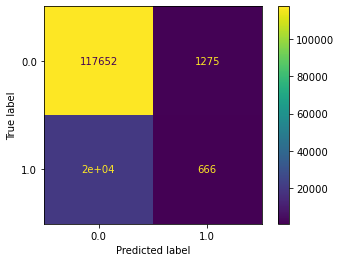

In [17]:
plot_confusion_matrix(model,X_test, y_test);

In [18]:
model.feature_importances_

array([1.10595072e-01, 2.40088369e-02, 1.90488464e-02, 1.74824839e-02,
       1.48802965e-02, 2.00826872e-02, 2.78711128e-02, 2.08573117e-02,
       1.57789920e-02, 1.53171582e-02, 1.28483920e-02, 2.01141648e-02,
       2.83353566e-02, 3.87407074e-02, 2.97448870e-02, 3.71674591e-02,
       3.55643898e-02, 3.74004627e-02, 6.08319292e-04, 3.40095021e-04,
       5.97789878e-04, 1.26441378e-03, 8.20614268e-03, 5.82657498e-04,
       2.63889313e-03, 4.37016944e-04, 3.38359602e-04, 1.30157364e-03,
       7.29315577e-04, 4.94051560e-04, 2.11560919e-04, 1.29531120e-03,
       1.64912571e-04, 4.35219341e-03, 8.00183585e-05, 5.54759850e-04,
       1.22940921e-03, 6.96660106e-04, 1.25175867e-03, 9.44091806e-04,
       2.56016193e-04, 4.04355627e-04, 1.31798243e-04, 4.05475069e-04,
       6.33148154e-04, 3.42497990e-04, 7.36037630e-04, 1.78473244e-03,
       8.36471159e-04, 2.74467602e-04, 2.28131120e-04, 4.14099942e-03,
       7.70810815e-04, 1.18227527e-03, 3.01263667e-04, 2.69707523e-03,
      

In [19]:
pd.DataFrame(index = X.columns, data = model.feature_importances_, columns = ["Feature Importance"]).sort_values('Feature Importance')

,Feature Importance
ORIGIN_MTJ,0.000003
ORIGIN_PSC,0.000033
ORIGIN_JNU,0.000035
ORIGIN_GTF,0.000074
ORIGIN_BTR,0.000080
...,...
DAY_OF_WEEK_6,0.035564
DAY_OF_WEEK_5,0.037167
DAY_OF_WEEK_7,0.037400
DAY_OF_WEEK_3,0.038741


In [21]:
from sklearn.tree import plot_tree

In [22]:
# plt.figure(figsize = (12,8), dpi = 200)
# plot_tree(model, feature_names = X.columns, filled = True);

In [23]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds))
    print('\n')
    plt.figure(figsize = (12,8), dpi = 200)
    plot_tree(model, feature_names = X.columns, filled = True);

In [24]:
pruned_tree = DecisionTreeClassifier(max_depth = 2)

In [25]:
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

/Users/bjackany/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bjackany/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bjackany/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92    118927
         1.0       0.00      0.00      0.00     20613

    accuracy                           0.85    139540
   macro avg       0.43      0.50      0.46    139540
weighted avg       0.73      0.85      0.78    139540





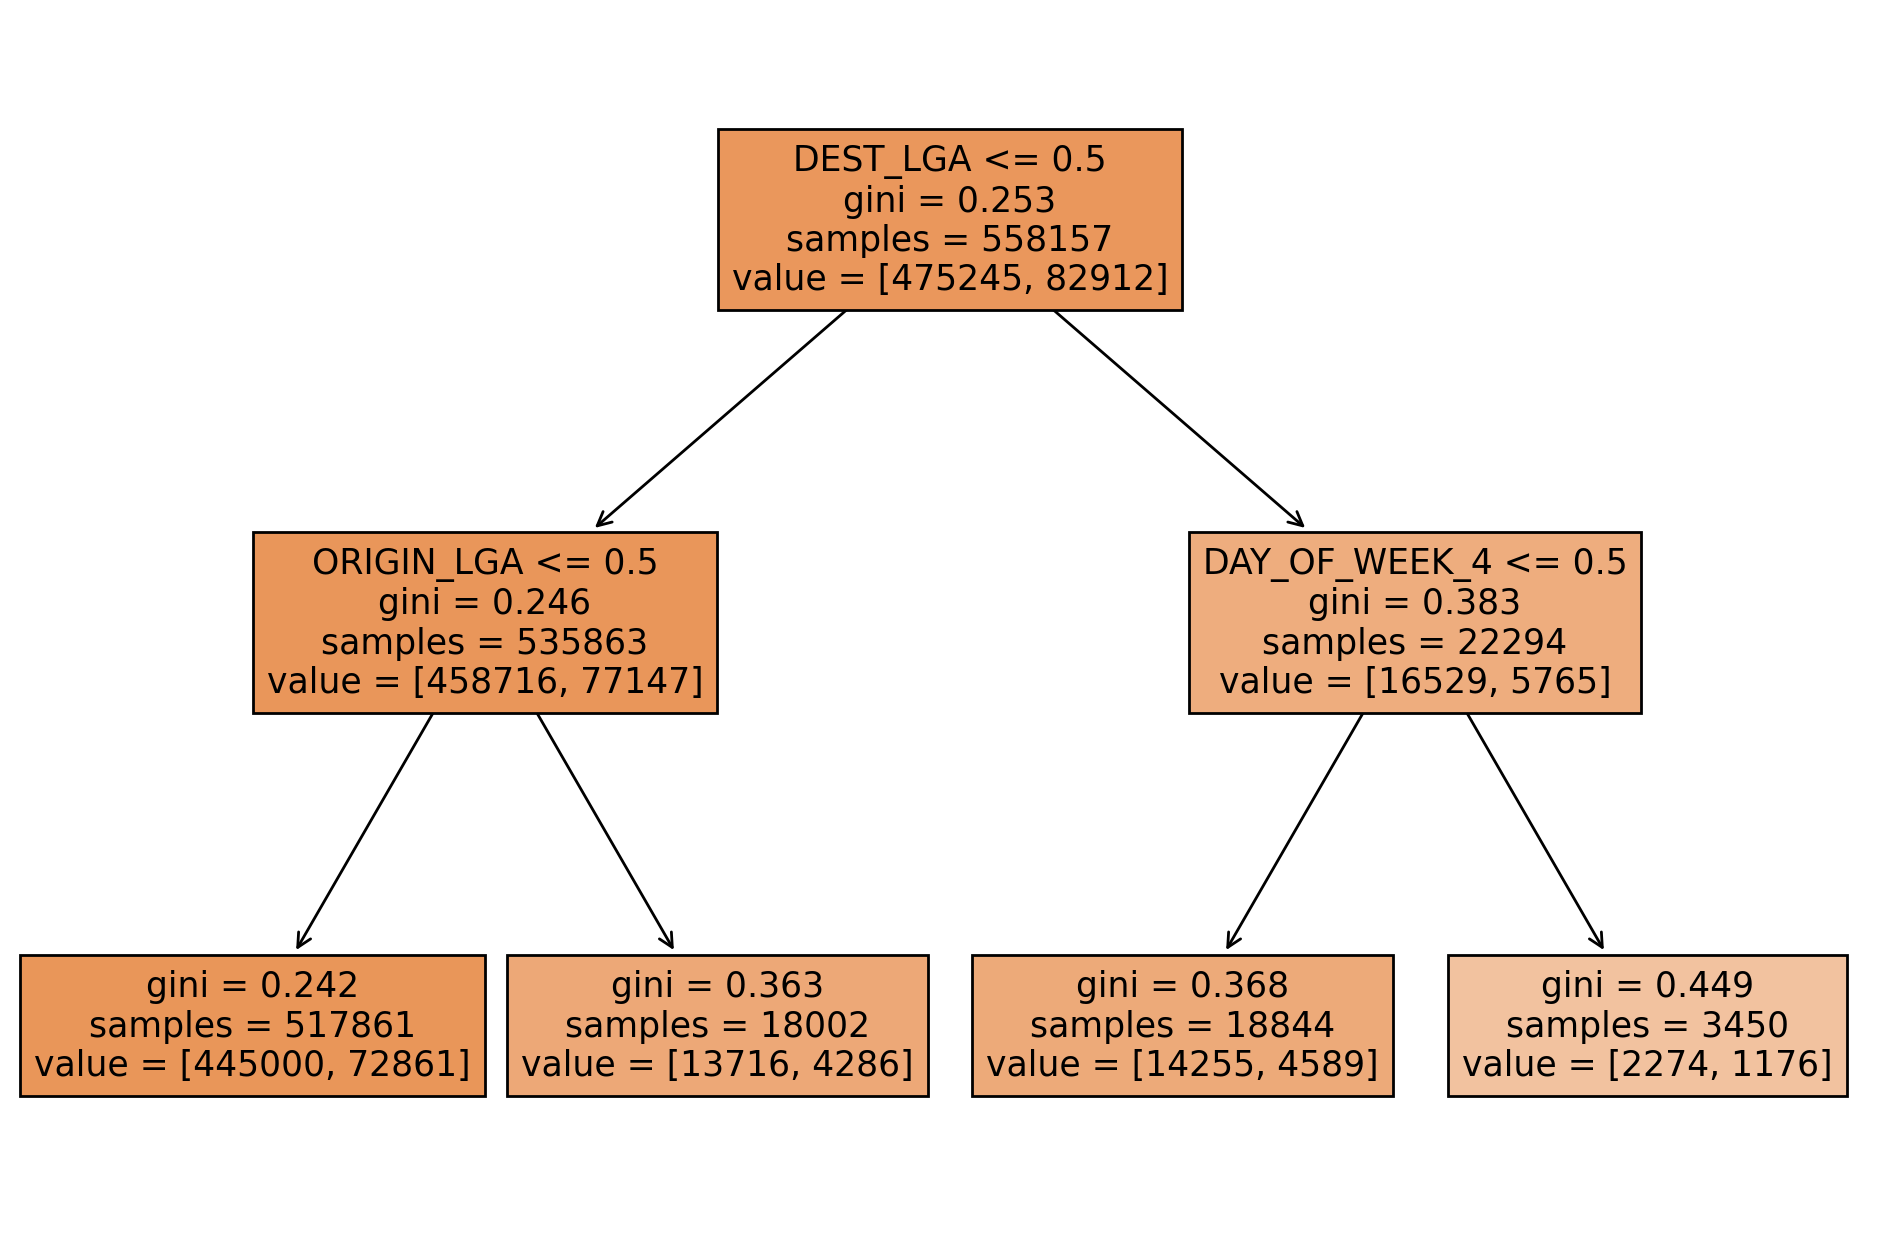

In [26]:
report_model(pruned_tree)

In [27]:
max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes= 3)

In [28]:
max_leaf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

/Users/bjackany/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bjackany/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bjackany/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92    118927
         1.0       0.00      0.00      0.00     20613

    accuracy                           0.85    139540
   macro avg       0.43      0.50      0.46    139540
weighted avg       0.73      0.85      0.78    139540





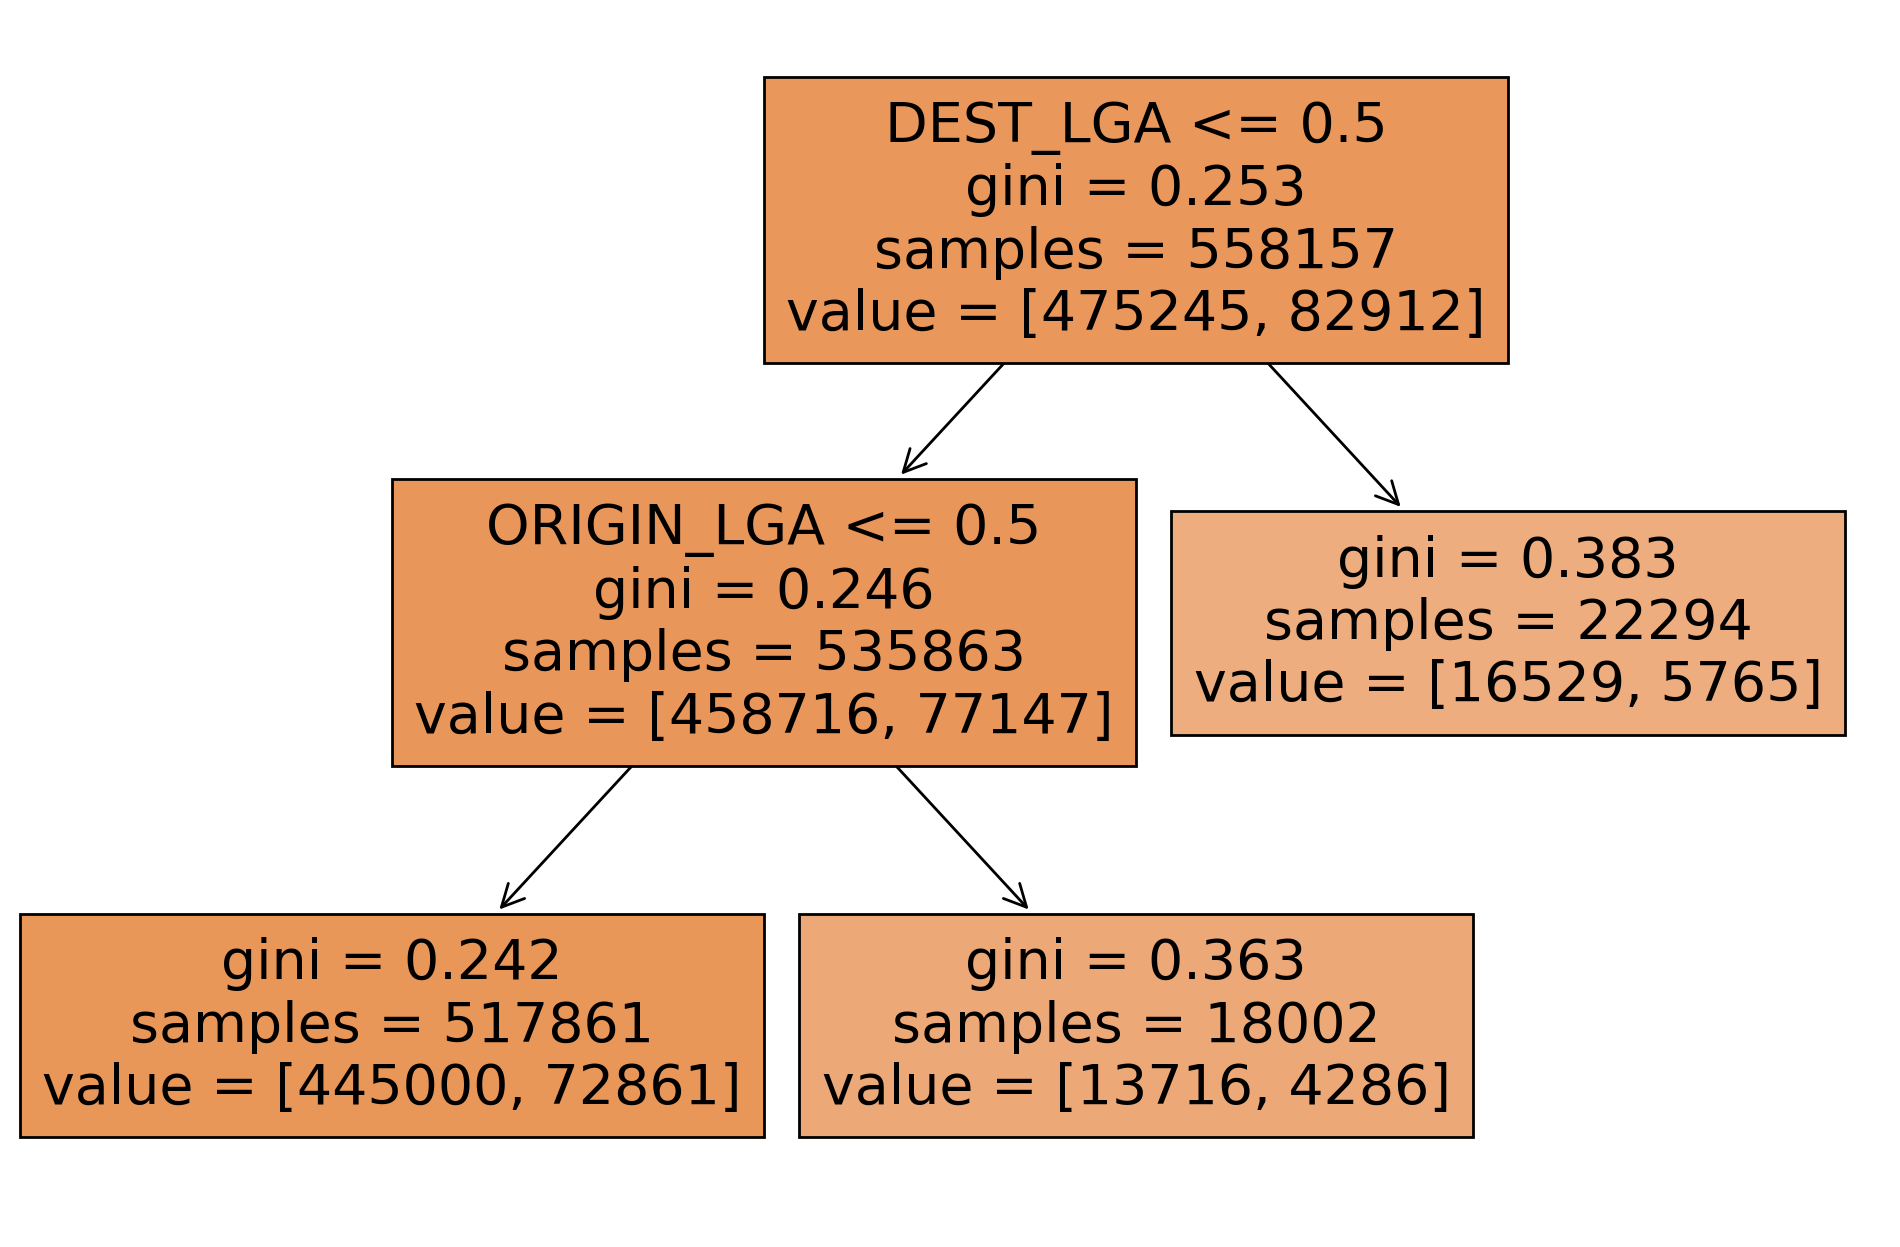

In [29]:
report_model(max_leaf_tree)

In [30]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')

In [31]:
entropy_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92    118927
         1.0       0.34      0.03      0.06     20613

    accuracy                           0.85    139540
   macro avg       0.60      0.51      0.49    139540
weighted avg       0.78      0.85      0.79    139540





KeyboardInterrupt: 

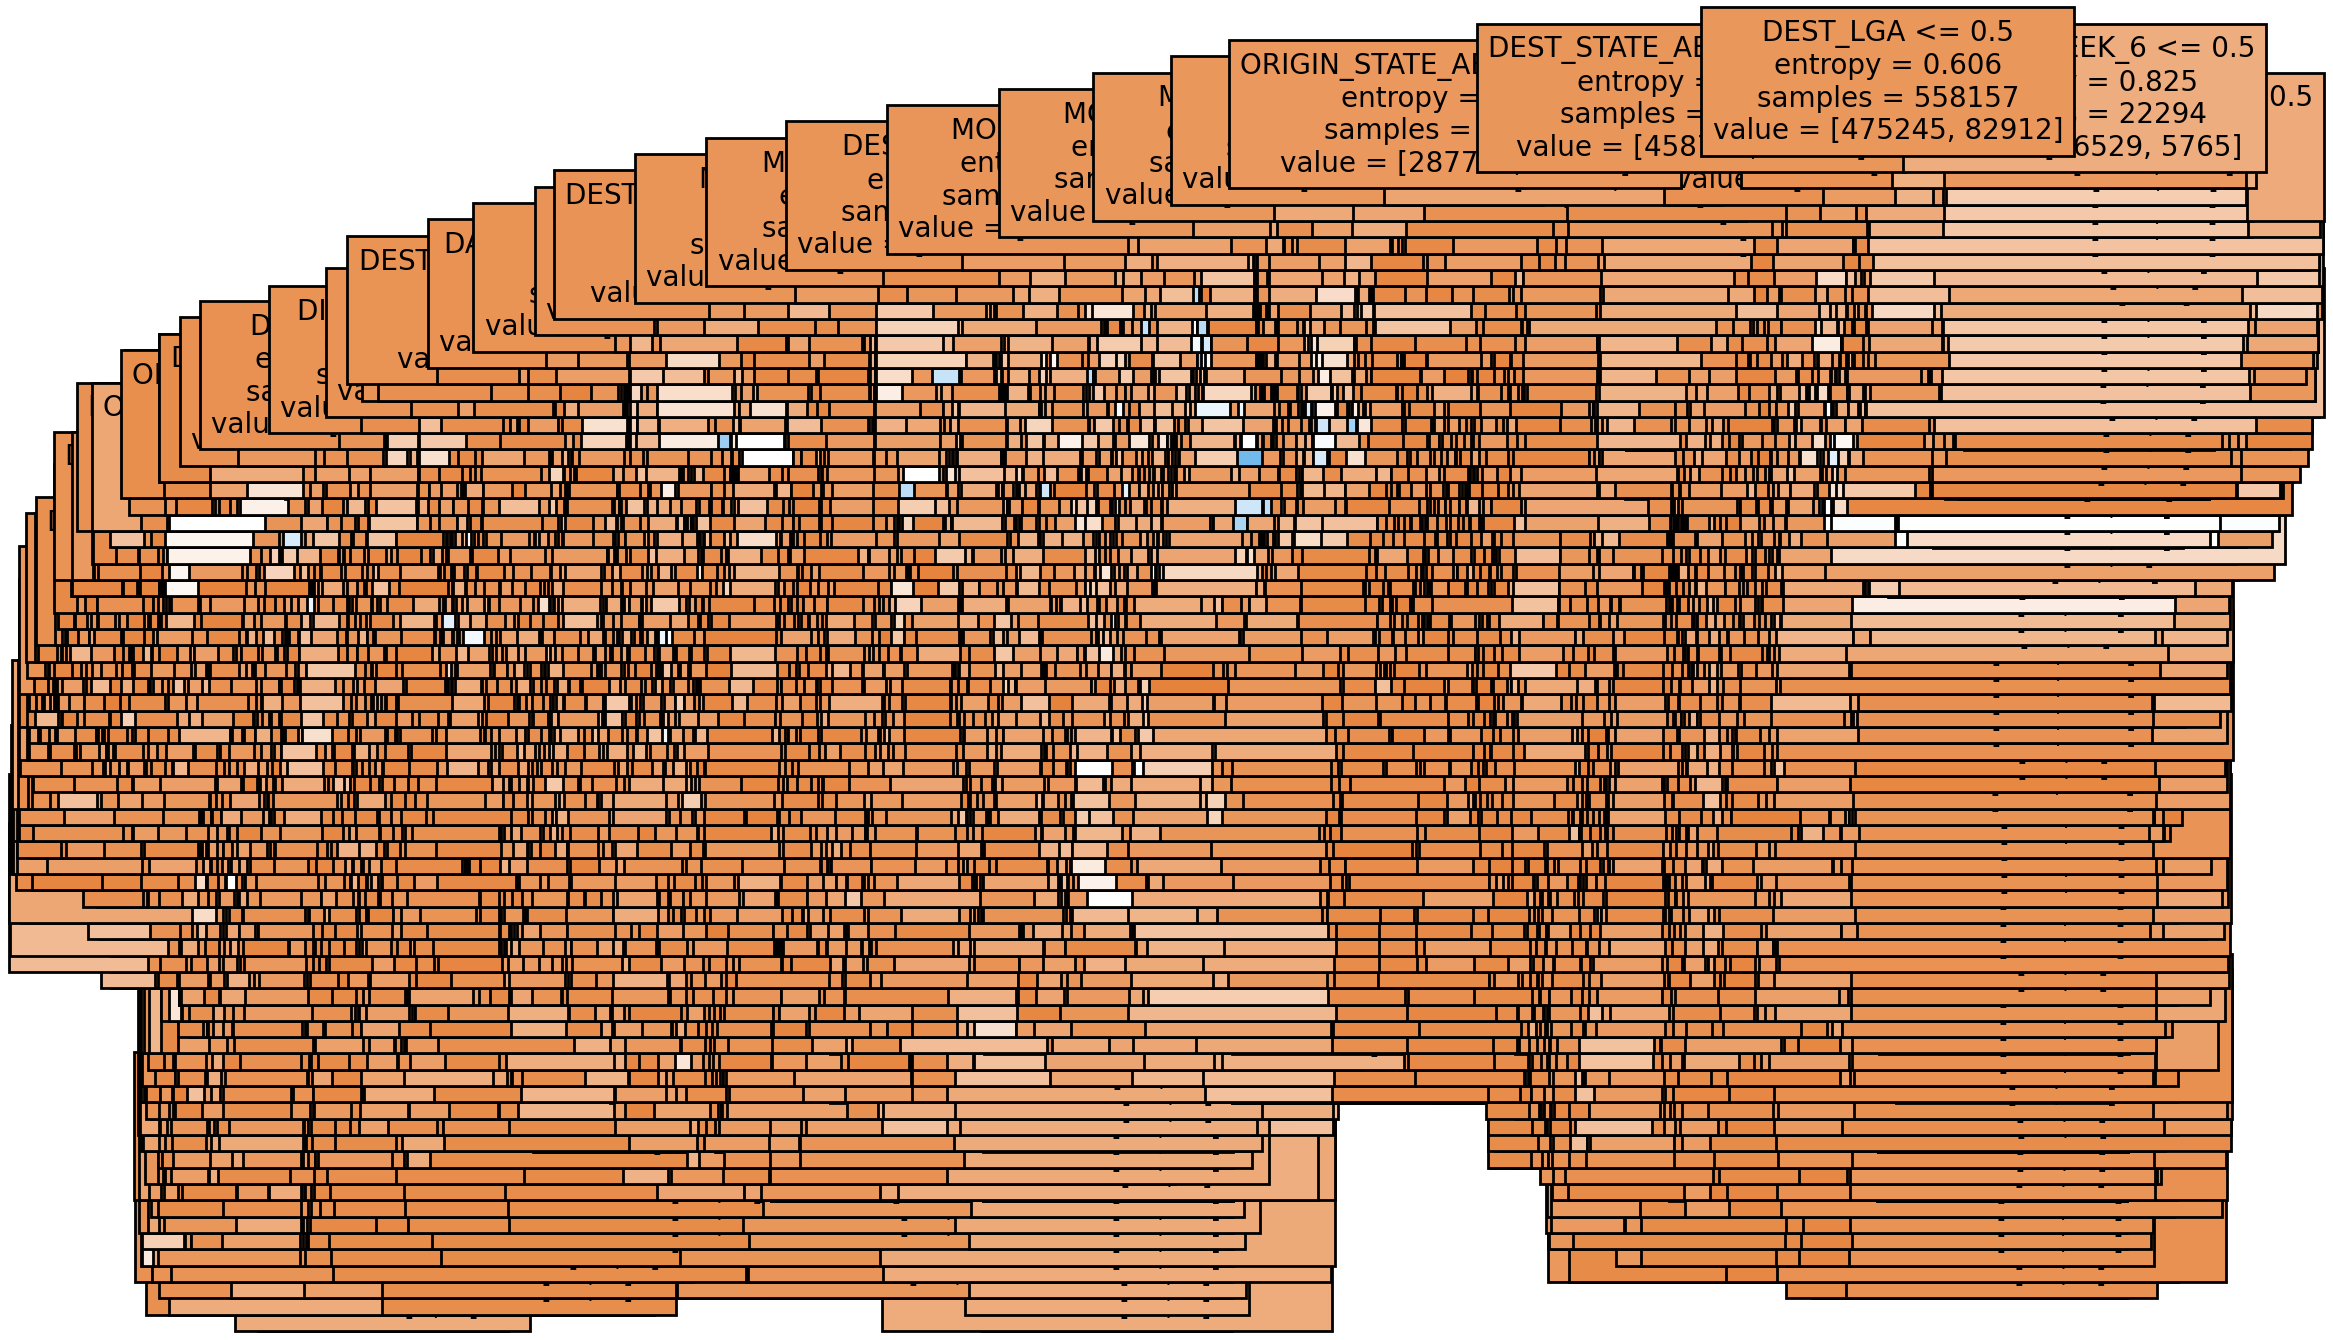

In [32]:
report_model(entropy_tree)